In [13]:
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as  plt
import matplotlib.dates as mdates
import mplcursors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker

from models import atmosDensity, Cubesat
from maneuvers import Maneuvers
from coordinates import cart2kep
from constants import constants
import helpers

In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: inline;
}
</style>

In [16]:
#----- INITIAL CONDITIONS -----
# Explicit conditions
rp = constants.Re+500e3
ra = constants.Re+501e3
Omega = 30*np.pi/180
i = 2*np.pi/180#65.1*np.pi/180
omega = 30*np.pi/180
M = 332*np.pi/180
#-------------------
# Derived conditions
e = (ra-rp)/(ra+rp)
a = (ra+rp)/2
#--------------------
# Final conditions
coe = [a,e,i,omega,Omega,M]
date = datetime.now()
#coe,date = helpers.parseTle("suchai0.tle")

#----- SPACECRAFT DEFINITIONS -----
satellite = Cubesat()

# ---- MANEUVERING ------
maneuvers = Maneuvers(coe,satellite,date)
maneuvers.propagate2(60*60*24*1)
maneuvers.addPerturbation("J2")
%time maneuvers.propagate2(60*60*24*1)

Propagating...from day  0.0  to  1.0
Day:0.0	Height: 500.058518193488 km	Mass: 1.0
Day:8.482702742016732e-08	Height: 500.058516290511 km	Mass: 1.0
Day:1.6965405484033464e-07	Height: 500.05851438756287 km	Mass: 1.0
Day:0.0008484399282565136	Height: 500.0409560450567 km	Mass: 1.0
Day:0.0008484399282565136	Height: 500.04095604849607 km	Mass: 1.0
Perc:0.0
Perc:10.0
Perc:20.0
Perc:30.0
Perc:40.0
Perc:50.0
Perc:60.0
Perc:70.0
Perc:80.0
Perc:90.0
Propagating...from day  1.0  to  2.0
Day:1.0	Height: 500.1640433921935 km	Mass: 1.0
Day:1.0000896786112239	Height: 500.1665265504522 km	Mass: 1.0
Day:1.0000896786112239	Height: 500.1672296737451 km	Mass: 1.0
Day:1.0000414918040326	Height: 500.16536402754764 km	Mass: 1.0
Day:1.0000414918040326	Height: 500.165514542968 km	Mass: 1.0
Day:1.000082983608065	Height: 500.1666899235919 km	Mass: 1.0
Day:1.000082983608065	Height: 500.1668404380763 km	Mass: 1.0
Day:1.0001659672161298	Height: 500.1689058653237 km	Mass: 1.0
Day:1.0001659672161298	Height: 500.16890

<IPython.core.display.Javascript object>


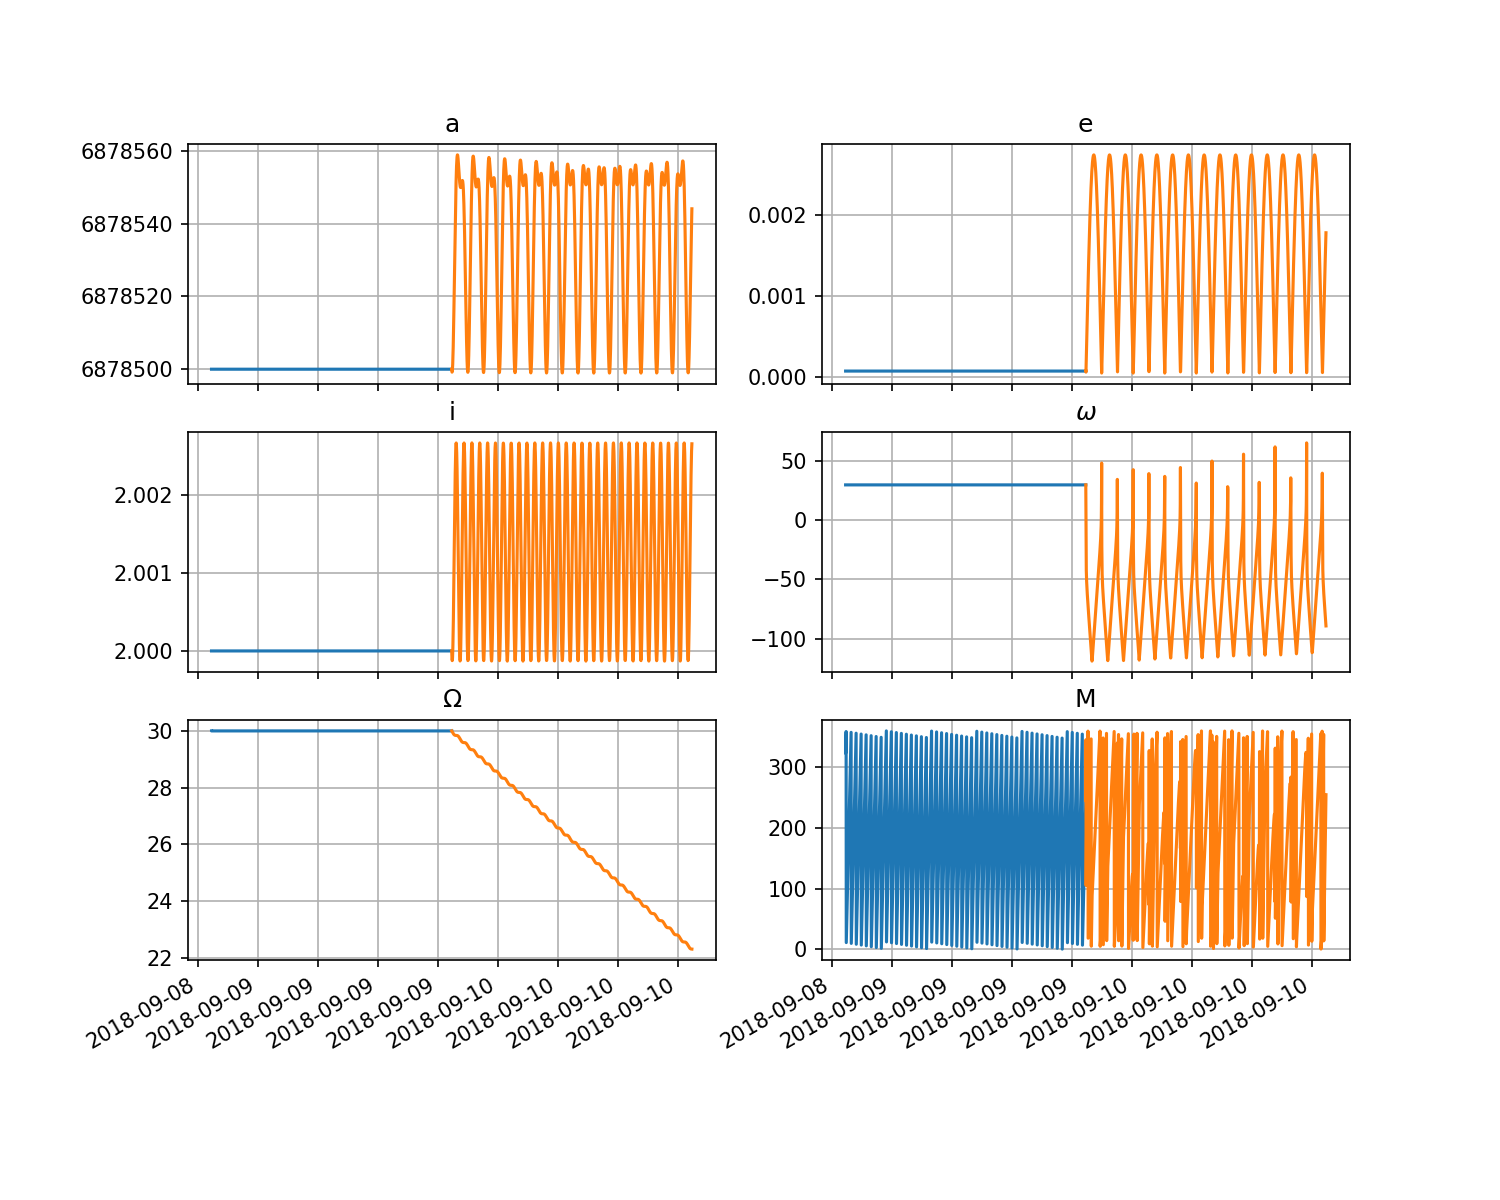

<IPython.core.display.Javascript object>


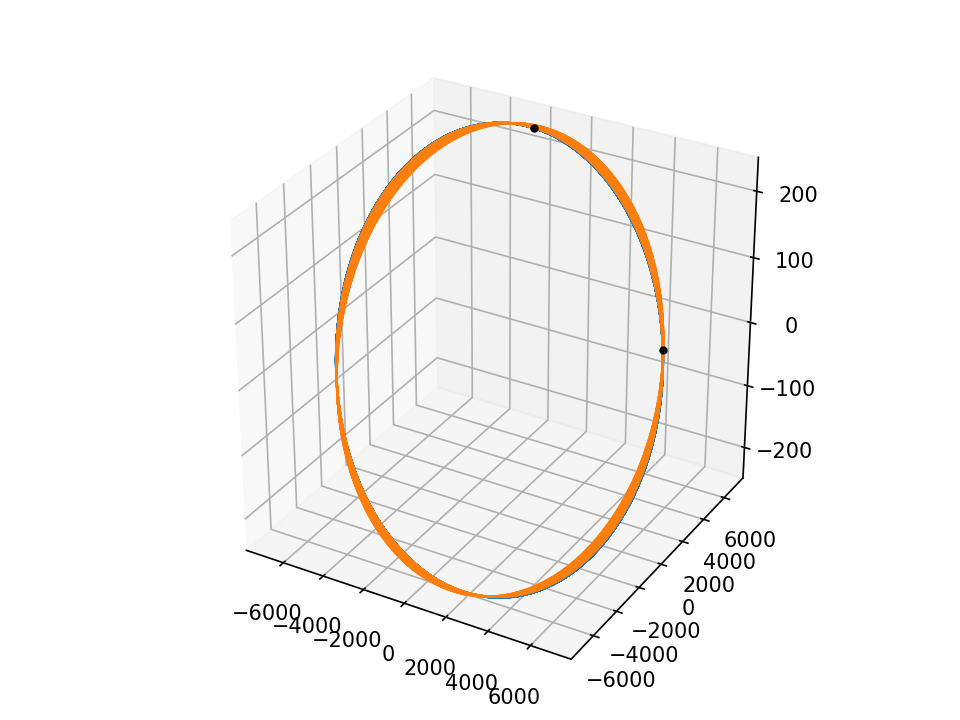

In [17]:
# PLOTTING CLASSICAL ORBITAL ELEMENTS
titles = ["a","e","i","$\omega$","$\Omega$","M"]
fig, axes = plt.subplots(3,2,figsize=(10,8))
for i in range(0,6):
    for j in range(0,len(maneuvers.history.maneuverIdxs)-1):
        maneuverSlice = slice(maneuvers.history.maneuverIdxs[j],maneuvers.history.maneuverIdxs[j+1])
        if i in [2,3,4,5]:
            axes[int((i-i%2)/2),i%2].plot(maneuvers.history.datetime[maneuverSlice],maneuvers.history.coe[maneuverSlice,i]*180/np.pi)
        else:
            axes[int((i-i%2)/2),i%2].plot(maneuvers.history.datetime[maneuverSlice],maneuvers.history.coe[maneuverSlice,i])
        axes[int((i-i%2)/2),i%2].set_title(titles[i])
        
        fig.autofmt_xdate()
        axes[int((i-i%2)/2),i%2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        axes[int((i-i%2)/2),i%2].yaxis.get_major_formatter().set_scientific(False)
        axes[int((i-i%2)/2),i%2].yaxis.get_major_formatter().set_useOffset(False)
        axes[int((i-i%2)/2),i%2].grid(b=True)
#Plot 3D Trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
markers = np.zeros([len(maneuvers.history.maneuverIdxs)-1,3])

for i in range(0,len(maneuvers.history.maneuverIdxs)-1):
    maneuverSlice = slice(maneuvers.history.maneuverIdxs[i],maneuvers.history.maneuverIdxs[i+1])
    ax.plot3D(maneuvers.history.r[maneuverSlice,0]/1000,
              maneuvers.history.r[maneuverSlice,1]/1000,
              maneuvers.history.r[maneuverSlice,2]/1000,linewidth=1)
    markers[i,:]= maneuvers.history.r[maneuvers.history.maneuverIdxs[i],:]/1000
ax.plot3D(markers[:,0],markers[:,1],markers[:,2],"k.")
ax.set_aspect("equal")
scale_x = 1.2
scale_y = 1.2
scale_z = 1.2
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([scale_x, scale_y, scale_z, 1]))

## Solar Pressure

In [18]:
# ---- MANEUVERING ------
maneuvers = Maneuvers(coe,satellite,date)
maneuvers.propagate2(60*60*24*1)
maneuvers.addPerturbation("solar_pressure")
%time maneuvers.propagate2(60*60*24*1)

Propagating...from day  0.0  to  1.0
Day:0.0	Height: 500.058518193488 km	Mass: 1.0
Day:8.482702742016732e-08	Height: 500.058516290511 km	Mass: 1.0
Day:1.6965405484033464e-07	Height: 500.05851438756287 km	Mass: 1.0
Day:0.0008484399282565136	Height: 500.0409560450567 km	Mass: 1.0
Day:0.0008484399282565136	Height: 500.04095604849607 km	Mass: 1.0
Perc:0.0
Perc:10.0
Perc:20.0
Perc:30.0
Perc:40.0
Perc:50.0
Perc:60.0
Perc:70.0
Perc:80.0
Perc:90.0
Propagating...from day  1.0  to  2.0
Day:1.0	Height: 500.1640433921935 km	Mass: 1.0
Day:1.0000896785440763	Height: 500.167229674072 km	Mass: 1.0
Day:1.0000896785440763	Height: 500.1672296713376 km	Mass: 1.0
Day:1.0001793570881523	Height: 500.170440397487 km	Mass: 1.0
Day:1.0001793570881523	Height: 500.17044039470704 km	Mass: 1.0
Perc:0.0
Perc:10.0
Perc:20.0
Perc:30.0
Perc:40.0
Perc:50.0
Perc:60.0
Perc:70.0
Perc:80.0
Perc:90.0
Wall time: 727 ms


<IPython.core.display.Javascript object>


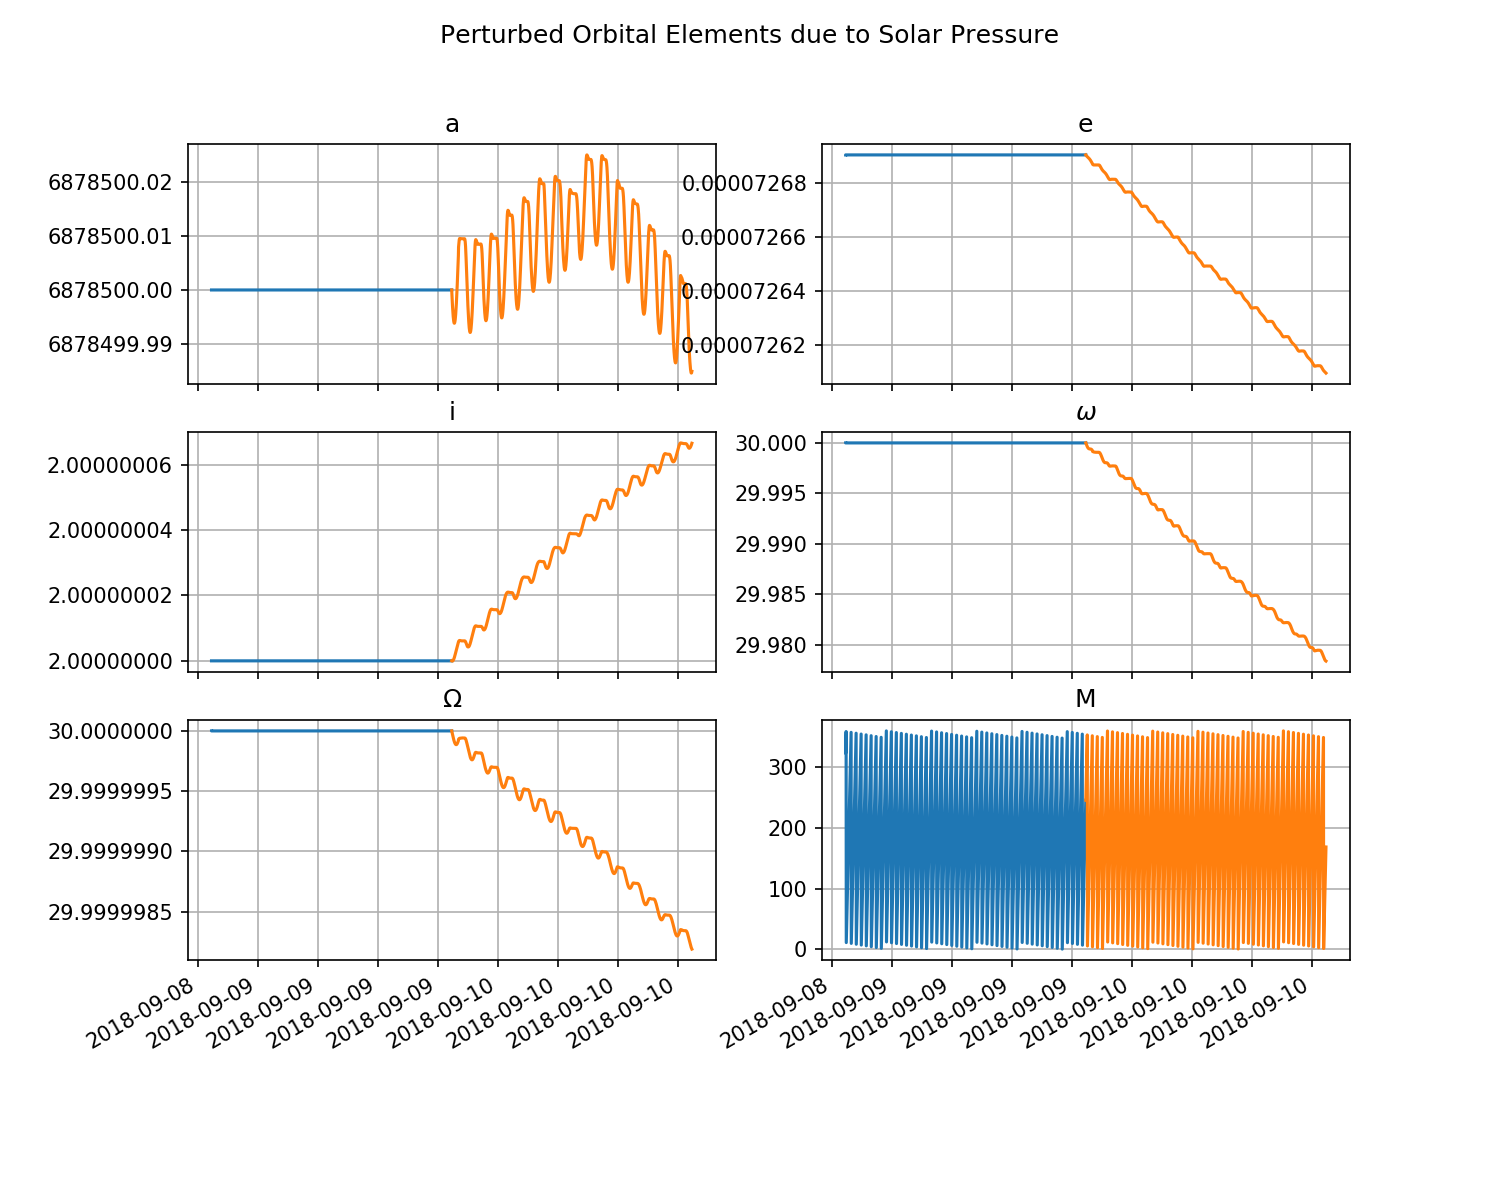

In [19]:
# PLOTTING CLASSICAL ORBITAL ELEMENTS
titles = ["a","e","i","$\omega$","$\Omega$","M"]
fig, axes = plt.subplots(3,2,figsize=(10,8))
fig.suptitle("Perturbed Orbital Elements due to Solar Pressure")
for i in range(0,6):
    for j in range(0,len(maneuvers.history.maneuverIdxs)-1):
        maneuverSlice = slice(maneuvers.history.maneuverIdxs[j],maneuvers.history.maneuverIdxs[j+1])
        if i in [2,3,4,5]:
            axes[int((i-i%2)/2),i%2].plot(maneuvers.history.datetime[maneuverSlice],maneuvers.history.coe[maneuverSlice,i]*180/np.pi)
        else:
            axes[int((i-i%2)/2),i%2].plot(maneuvers.history.datetime[maneuverSlice],maneuvers.history.coe[maneuverSlice,i])
        axes[int((i-i%2)/2),i%2].set_title(titles[i])
        
        fig.autofmt_xdate()
        axes[int((i-i%2)/2),i%2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        axes[int((i-i%2)/2),i%2].yaxis.get_major_formatter().set_scientific(False)
        axes[int((i-i%2)/2),i%2].yaxis.get_major_formatter().set_useOffset(False)
        axes[int((i-i%2)/2),i%2].grid(b=True)

## Moon's Gravity

In [36]:
# ---- MANEUVERING ------
maneuvers = Maneuvers(coe,satellite,date)
maneuvers.propagate2(60*60*24*1)
maneuvers.addPerturbation("moon_gravity")
%time maneuvers.propagate2(60*60*24*1)

Propagating...from day  0.0  to  1.0
Day:0.0	Height: 500.058518193488 km	Mass: 1.0
Day:8.482702742016732e-08	Height: 500.058516290511 km	Mass: 1.0
Day:1.6965405484033464e-07	Height: 500.05851438756287 km	Mass: 1.0
Day:0.0008484399282565136	Height: 500.0409560450567 km	Mass: 1.0
Day:0.0008484399282565136	Height: 500.04095604849607 km	Mass: 1.0
Perc:0.0
Perc:10.0
Perc:20.0
Perc:30.0
Perc:40.0
Perc:50.0
Perc:60.0
Perc:70.0
Perc:80.0
Perc:90.0
Propagating...from day  1.0  to  2.0
Day:1.0	Height: 500.1640433921935 km	Mass: 1.0
Day:1.0000896785440567	Height: 500.1672296949858 km	Mass: 1.0
Day:1.0000896785440567	Height: 500.1672296713386 km	Mass: 1.0
Day:1.0001793570881132	Height: 500.17044044144916 km	Mass: 1.0
Day:1.0001793570881132	Height: 500.17044041669465 km	Mass: 1.0
Perc:0.0
Perc:10.0
Perc:20.0
Perc:30.0
Perc:40.0
Perc:50.0
Perc:60.0
Perc:70.0
Perc:80.0
Perc:90.0
Wall time: 172 ms


<IPython.core.display.Javascript object>


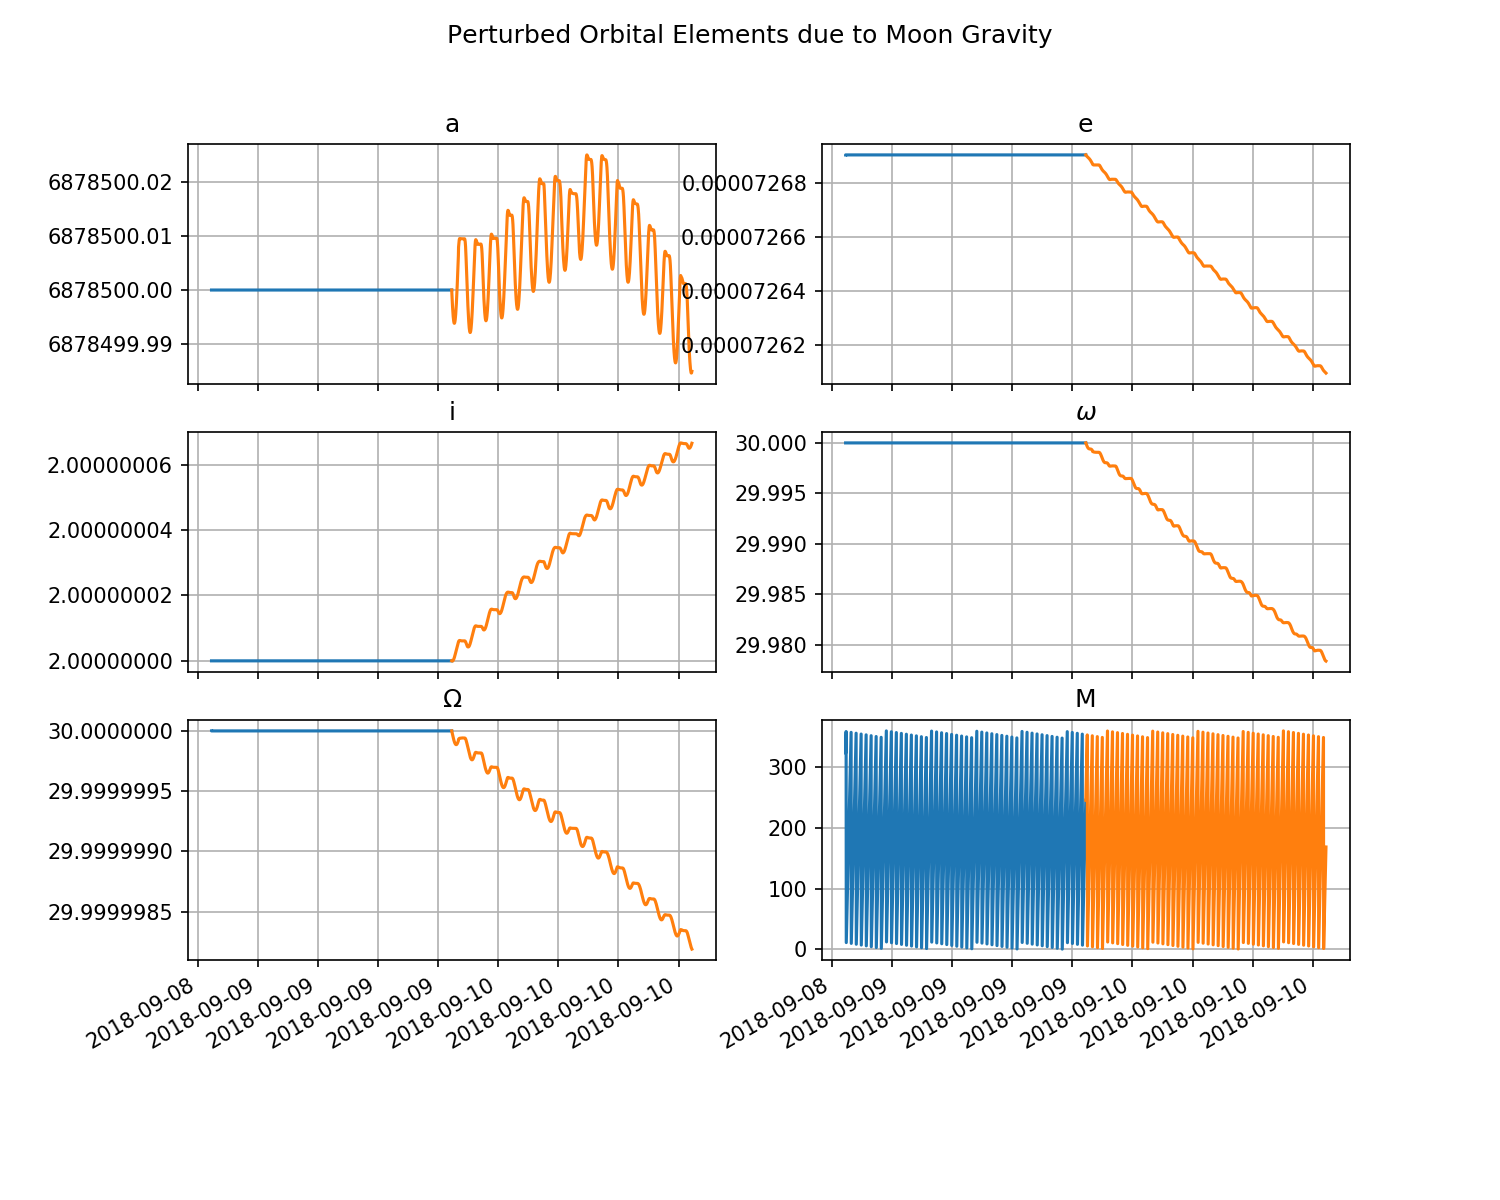

In [12]:
# PLOTTING CLASSICAL ORBITAL ELEMENTS
titles = ["a","e","i","$\omega$","$\Omega$","M"]
fig, axes = plt.subplots(3,2,figsize=(10,8))
fig.suptitle("Perturbed Orbital Elements due to Moon Gravity")
for i in range(0,6):
    for j in range(0,len(maneuvers.history.maneuverIdxs)-1):
        maneuverSlice = slice(maneuvers.history.maneuverIdxs[j],maneuvers.history.maneuverIdxs[j+1])
        if i in [2,3,4,5]:
            axes[int((i-i%2)/2),i%2].plot(maneuvers.history.datetime[maneuverSlice],maneuvers.history.coe[maneuverSlice,i]*180/np.pi)
        else:
            axes[int((i-i%2)/2),i%2].plot(maneuvers.history.datetime[maneuverSlice],maneuvers.history.coe[maneuverSlice,i])
        axes[int((i-i%2)/2),i%2].set_title(titles[i])
        
        fig.autofmt_xdate()
        axes[int((i-i%2)/2),i%2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        axes[int((i-i%2)/2),i%2].yaxis.get_major_formatter().set_scientific(False)
        axes[int((i-i%2)/2),i%2].yaxis.get_major_formatter().set_useOffset(False)
        axes[int((i-i%2)/2),i%2].grid(b=True)